<a href="https://colab.research.google.com/github/rajatpaliwal/fruit_freshness_classifier/blob/main/fresh_fruit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 4.7MB/s 
     |████████████████████████████████| 1.2MB 10.8MB/s 
     |████████████████████████████████| 204kB 24.4MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 


In [2]:
import fastbook
fastbook.setup_book()


Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [20]:
cd "/content/gdrive/MyDrive/ML projects/Fresh_fruit_detector/dataset"

/content/gdrive/MyDrive/ML projects/Fresh_fruit_detector/dataset


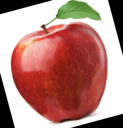

In [5]:
dest = 'train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png'
im = Image.open(dest)
im.to_thumb(128,128)

In [6]:
path = Path('train')
fns = get_image_files(path)
fns
#print(len(fns))

(#11069) [Path('train/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.03.47 PM.png'),Path('train/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.15.39 PM.png'),Path('train/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.09.03 PM.png'),Path('train/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.02.08 PM.png'),Path('train/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.10.03 PM.png'),Path('train/freshapples/rotated_by_30_Screen Shot 2018-06-08 at 5.26.58 PM.png'),Path('train/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.05.48 PM.png'),Path('train/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.06.10 PM.png'),Path('train/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.14.48 PM.png'),Path('train/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.07.05 PM.png')...]

Checking if there are any corrupt files in the train dataset

In [9]:
failed = verify_images(fns)
failed

(#0) []

Creating a dataloader object

In [10]:
fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [11]:
dls = fruits.dataloaders(path)

Displaying images loaded in a dataloader object

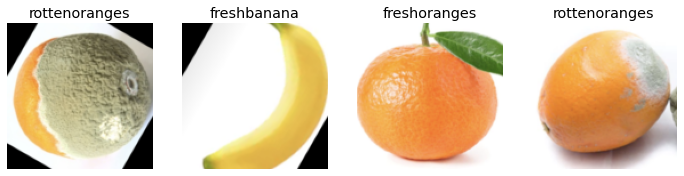

In [12]:
dls.valid.show_batch(max_n=4, nrows=1)

Performing some data augmentation

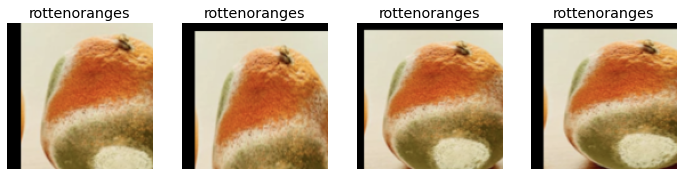

In [16]:
fruits = fruits.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = fruits.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Creating the learner and training the model resnet18

In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.390542,0.099180,0.028468,11:08


epoch,train_loss,valid_loss,error_rate,time
0,0.106960,0.036617,0.012653,15:15
1,0.061047,0.006253,0.002711,15:11
2,0.030291,0.004965,0.002259,15:10


epoch,train_loss,valid_loss,error_rate,time
0,0.106960,0.036617,0.012653,15:15
1,0.061047,0.006253,0.002711,15:11
2,0.030291,0.004965,0.002259,15:10
3,0.014717,0.003094,0.001356,15:04


Creating confusion matrix to see how good our model is doing.

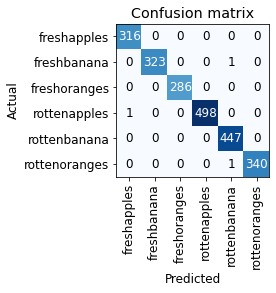

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

The model looks good. Lets export this model

In [19]:
learn.export()

Checking if the file exists

In [8]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [9]:
learn_inf = load_learner(path/'export.pkl')

In [25]:
cd "/content/gdrive/MyDrive/ML projects/Fresh_fruit_detector/dataset/"

/content/gdrive/MyDrive/ML projects/Fresh_fruit_detector/dataset


In [30]:
learn_inf.predict('test/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.03.47 PM.png')

('freshapples',
 tensor(0),
 tensor([1.0000e+00, 9.8750e-10, 1.4570e-08, 3.0506e-11, 2.4466e-13, 8.2092e-12]))

In [31]:
learn_inf.dls.vocab

['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']

Now creating a notebook app using Ipython widget

In [32]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

Now we will grab the image

In [35]:
pwd

'/content/gdrive/My Drive/ML projects/Fresh_fruit_detector/dataset'

In [38]:
btn_upload = SimpleNamespace(data = ['test/rottenbanana/rotated_by_15_Screen Shot 2018-06-12 at 8.49.59 PM.png'])
img = PILImage.create(btn_upload.data[-1])

Ceating output widget

In [39]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

Getting our prediction and using our label to predict it.

In [40]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: rottenbanana; Probability: 1.0000')

Now we will do a button to do the classification which looks like the upload button.

In [41]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [42]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

Putting it all together now vertically

In [43]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your fruit!'), 
      btn_upload, btn_run, out_pl, lbl_pred])